*Author:*  
**Ella Pournezhad**  
  
*Description:*   
**Air Pollution Data is being cleansed, processed and analysed in this code.**  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### Functions Defining:

In [2]:
# Define custom aggregation functions
def custom_mean(x):
    return x.mean()

def custom_min(x):
    return x.min()

def custom_max(x):
    return x.max()

In [3]:
def drop_status_column(df):
    for column in df.columns:
        if column.startswith('Status'):
            df.drop(columns=[column], inplace=True)

In [4]:
def merge_dataframes(dataframes):
    '''This function merges multiple dataframes'''
    merged_df = pd.concat(dataframes, ignore_index=True, sort=False)
    return merged_df

In [5]:
def add_station_name(df, file_name):
    ''' This function extracts station name from file name and adds it in StationName column'''
    station_name = file_name.split('/')[-1].split(' ')[1:-1]  # Extracting words between first and last in file name
    station_name = ' '.join(station_name)
    station_name = station_name.replace("'", "")
    df.insert(2, "StationName", station_name)

In [6]:
def read_and_add_station_name(file_path):
    df = pd.read_csv(file_path)
    add_station_name(df, file_path)
    return df

In [7]:
def convert_to_float(df, columns):
    for column in columns:
        df[column] = df[column].astype(float)

In [8]:
def remove_rows_with_negative_values(df, pollutant_columns):
    ''' This function removes rows with negative value for one pollutant.'''
    mask = df[pollutant_columns] < 0
    rows_with_negative_values = mask.any(axis=1)
    df_cleaned = df[~rows_with_negative_values]
    return df_cleaned

#### Loading Data Files:

In the original data files downloaded from the site (????? site must be added ?????)  
there were some extra rows **outside the table** which were removed manually.

In [9]:
df1_path = "AP data - changed/Bristol Centre 2004-2006.csv"
df2_path = "AP data - changed/Bristol Temple Way 2018-2024.csv"
df3_path = "AP data - changed/Bristol Old Market 2004-2013.csv"
df4_path = "AP data - changed/Bristol St Paul's 2007-2024.csv"

In [10]:
# Loading data and adding StationName to each dataframe
df1 = read_and_add_station_name(df1_path)
df2 = read_and_add_station_name(df2_path)
df3 = read_and_add_station_name(df3_path)
df4 = read_and_add_station_name(df4_path)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19376\3136336549.py:2: DtypeWarning: Columns (17,19,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


#### Preprocessing Data:

In [11]:
# Dropping 'Status' columns if they exist
drop_status_column(df1)
drop_status_column(df2)
drop_status_column(df3)
drop_status_column(df4)

df1.info()  
df2.info()  
df3.info()  
df4.info()  

In [12]:
# Merging dataframes
merged_df = merge_dataframes([df1, df2, df3, df4])

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293478 entries, 0 to 293477
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   Date                                        293475 non-null  object
 1   Time                                        293474 non-null  object
 2   StationName                                 293478 non-null  object
 3   Ozone                                       163992 non-null  object
 4   Nitric oxide                                293474 non-null  object
 5   Nitrogen dioxide                            293474 non-null  object
 6   Nitrogen oxides as nitrogen dioxide         293474 non-null  object
 7   Sulphur dioxide                             163992 non-null  object
 8   Carbon monoxide                             239976 non-null  object
 9   PM10 particulate matter (Hourly measured)   217490 non-null  object
 10  Modelled

In [14]:
# importing into CSV
merged_df.to_csv('AP data - merged.csv' , index= False)

#### Data Cleansing:

In [15]:
df_clean = merged_df

In [16]:
# Changing 'No data' values into valid NaN
df_clean = df_clean.replace('No data	', np.NaN)
df_clean = df_clean.replace('No data', np.NaN)

In [17]:
# Sorting Data
df_clean = df_clean.sort_values(by=['Date', 'Time', 'StationName'])
df_clean = df_clean.reset_index(drop=True)

In [18]:
# Converting Date column into valid datetime type
df_clean['Date2'] = pd.to_datetime(df_clean['Date'], format='%m/%d/%Y', errors='coerce')

In [19]:
# Removing rows with invalid dates
df_clean['Date'] = df_clean['Date2']
df_clean = df_clean.dropna(subset=['Date'])
df_clean.drop(columns=['Date2'], inplace= True)

In [20]:
# Defining list of pollutant columns and wind columns and all columns

all_columns = ['Ozone', 'Nitric oxide', 'Nitrogen dioxide', 
                 'Nitrogen oxides as nitrogen dioxide', 
                 'Sulphur dioxide', 'Carbon monoxide', 
                 'PM10 particulate matter (Hourly measured)',
                 'Modelled Wind Direction', 'Modelled Wind Speed',
                 'Modelled Temperature',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)']

pollutants = ['Ozone', 'Nitric oxide', 'Nitrogen dioxide', 
                 'Nitrogen oxides as nitrogen dioxide', 
                 'Sulphur dioxide', 'Carbon monoxide', 
                 'PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)']

Nitrogen_pollutants = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide']

PM_pollutants = ['PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)']

Winds = ['Modelled Wind Direction', 'Modelled Wind Speed', 'Modelled Temperature']

stations = df_clean['StationName'].unique()

In [21]:
# Changing Datatypes
convert_to_float(df_clean, all_columns)

In [22]:
# Removing rows with negative value pollutants
df_clean = remove_rows_with_negative_values(df_clean, pollutants)

In [23]:
df_clean.describe()

,Date,Ozone,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Sulphur dioxide,Carbon monoxide,PM10 particulate matter (Hourly measured),Modelled Wind Direction,Modelled Wind Speed,Modelled Temperature,Non-volatile PM10 (Hourly measured),Volatile PM10 (Hourly measured),PM2.5 particulate matter (Hourly measured),Non-volatile PM2.5 (Hourly measured),Volatile PM2.5 (Hourly measured)
count,279761,143480.000000,270238.000000,263035.000000,263034.000000,58468.000000,120875.000000,187617.000000,46969.000000,46969.000000,46969.000000,86821.000000,86814.000000,106864.000000,72542.000000,72542.000000
mean,2014-01-28 05:35:47.471591680,44.321060,30.235513,36.825850,81.231178,2.419751,0.422890,19.160492,195.661675,4.795753,9.674556,15.284098,3.602358,12.038296,9.951749,3.629247
min,2004-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008-09-28 00:00:00,26.000000,2.272295,15.045235,19.408898,0.000000,0.200000,10.700000,124.100000,2.900000,6.000000,8.000000,1.600000,5.600000,4.000000,2.000000
50%,2013-01-24 00:00:00,46.000000,7.000000,29.000000,40.000000,3.000000,0.300000,16.000000,217.000000,4.300000,9.500000,12.300000,3.000000,8.800000,7.000000,3.000000
75%,2020-01-08 00:00:00,62.000000,33.000000,51.757450,98.375655,3.000000,0.500000,24.000000,268.300000,6.200000,13.400000,19.000000,5.000000,14.600000,12.100000,4.700000
max,2024-02-08 00:00:00,178.216010,888.000000,288.000000,1645.000000,82.000000,6.300000,481.000000,360.000000,19.000000,29.700000,465.000000,29.000000,320.000000,311.000000,26.000000
std,NaN,25.259977,54.140073,28.130900,104.704643,3.285349,0.368914,13.288959,90.564160,2.655042,5.322904,12.591567,3.011835,11.419159,10.404207,2.853946


In [24]:
df_clean.head(5)

,Date,Time,StationName,Ozone,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Sulphur dioxide,Carbon monoxide,PM10 particulate matter (Hourly measured),Modelled Wind Direction,Modelled Wind Speed,Modelled Temperature,Non-volatile PM10 (Hourly measured),Volatile PM10 (Hourly measured),PM2.5 particulate matter (Hourly measured),Non-volatile PM2.5 (Hourly measured),Volatile PM2.5 (Hourly measured)
0,2004-01-01,10:00:00,Centre,58.0,3.0,15.0,19.0,0.0,0.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-01,10:00:00,Old Market,NaN,1.0,21.0,23.0,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-01-01,11:00:00,Centre,60.0,3.0,19.0,23.0,3.0,0.1,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-01-01,11:00:00,Old Market,NaN,1.0,25.0,27.0,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-01-01,12:00:00,Centre,64.0,4.0,15.0,21.0,3.0,0.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Synchronize

To calculate the correlation between hourly time series data and monthly data, we need to synchronize them properly. Here are a few approaches to consider:  

<b> </b>  
**Resampling**: Resample hourly data to monthly frequency. This involves aggregating the hourly data into monthly intervals by taking the mean, sum, or another aggregation function.   

<b> </b>  
**Rolling Window Aggregation**: Instead of resampling, calculate rolling window statistics (e.g., mean, sum) over monthly intervals for hourly data. This approach gives more flexibility in capturing short-term variations within each month.  

<b> </b>     
**Interpolation**: If hourly data is dense enough, interpolating it to fill in missing values and then aggregate to monthly frequency. This might be useful ifneed to preserve the original granularity of hourly data.  

<b> </b>   
**Aligning Timestamps**: Align the timestamps of hourly data with the timestamps of monthly data. Then, aggregate the hourly data within each month (e.g., take the mean) to match the monthly frequency.  

<b> </b>  
  

In [25]:
# Resampling air pollution data to monthly frequency, grouped by StationName

monthly_air_pollution = df_clean.groupby(['StationName', pd.Grouper(key='Date', freq='M')]).agg({
    'Ozone': ['mean', 'min', 'max'],
    'Nitric oxide': ['mean', 'min', 'max'],
    'Nitrogen dioxide': ['mean', 'min', 'max'],
    'Nitrogen oxides as nitrogen dioxide': ['mean', 'min', 'max'],
    'Sulphur dioxide': ['mean', 'min', 'max'],
    'Carbon monoxide': ['mean', 'min', 'max'],
    'PM10 particulate matter (Hourly measured)': ['mean', 'min', 'max'],
    'Non-volatile PM10 (Hourly measured)' : ['mean', 'min', 'max'],
    'Volatile PM10 (Hourly measured)': ['mean', 'min', 'max'],
    'PM2.5 particulate matter (Hourly measured)': ['mean', 'min', 'max'],
    'Non-volatile PM2.5 (Hourly measured)': ['mean', 'min', 'max'],
    'Volatile PM2.5 (Hourly measured)': ['mean', 'min', 'max'],
})


In [26]:
monthly_air_pollution

Ozone             Nitric oxide           \
                             mean  min    max         mean      min   
StationName Date                                                      
Centre      2004-01-31  40.588045  2.0   88.0    26.461648  0.00000   
            2004-02-29  37.623053  2.0   86.0    23.259016  0.00000   
            2004-03-31  44.042042  0.0   94.0    27.082707  0.00000   
            2004-04-30  53.327217  2.0  120.0    17.520394  0.00000   
            2004-05-31  48.181556  2.0  100.0    19.350474  0.00000   
...                           ...  ...    ...          ...      ...   
Temple Way  2023-10-31        NaN  NaN    NaN    16.172775  0.06547   
            2023-11-30        NaN  NaN    NaN    22.172929  0.33224   
            2023-12-31        NaN  NaN    NaN    16.918795  0.18086   
            2024-01-31        NaN  NaN    NaN    27.772395  0.12473   
            2024-02-29        NaN  NaN    NaN     8.006932  0.00000   

                                  Nitrogen dioxide                      \
                              max             mean      min        max   
StationName Date                                                         
Centre      2004-01-31  380.00000        34.789773  4.00000   88.00000   
            2004-02-29  520.00000        41.314754  4.00000   78.00000   
            2004-03-31  423.00000        37.374436  0.00000   99.00000   
            2004-04-30  244.00000        34.549930  4.00000  120.00000   
            2004-05-31  279.00000        36.905277  6.00000   97.00000   
...                           ...              ...      ...        ...   
Temple Way  2023-10-31  129.38851        26.379383  1.87259   58.97705   
            2023-11-30  218.24185        27.004774  1.42291   63.79490   
            2023-12-31  292.22351        23.057091  0.26010   70.42064   
            2024-01-31  343.01623        32.355190  1.14559   76.35656   
            2024-02-29   91.67655        17.316000  1.33875   66.74625   

                       Nitrogen oxides as nitrogen dioxide  ...  \
                                                      mean  ...   
StationName Date                                            ...   
Centre      2004-01-31                           75.113636  ...   
            2004-02-29                           76.532787  ...   
            2004-03-31                           78.592481  ...   
            2004-04-30                           61.158931  ...   
            2004-05-31                           66.320704  ...   
...                                                    ...  ...   
Temple Way  2023-10-31                           51.177291  ...   
            2023-11-30                           61.002791  ...   
            2023-12-31                           48.998880  ...   
            2024-01-31                           74.938933  ...   
            2024-02-29                           29.483055  ...   

                       Volatile PM10 (Hourly measured)  \
                                                   max   
StationName Date                                         
Centre      2004-01-31                             NaN   
            2004-02-29                             NaN   
            2004-03-31                             NaN   
            2004-04-30                             NaN   
            2004-05-31                             NaN   
...                                                ...   
Temple Way  2023-10-31                             NaN   
            2023-11-30                             NaN   
            2023-12-31                             NaN   
            2024-01-31                             NaN   
            2024-02-29                             NaN   

                       PM2.5 particulate matter (Hourly measured)          \
                                                             mean min max   
StationName Date                                                            
Centre      2

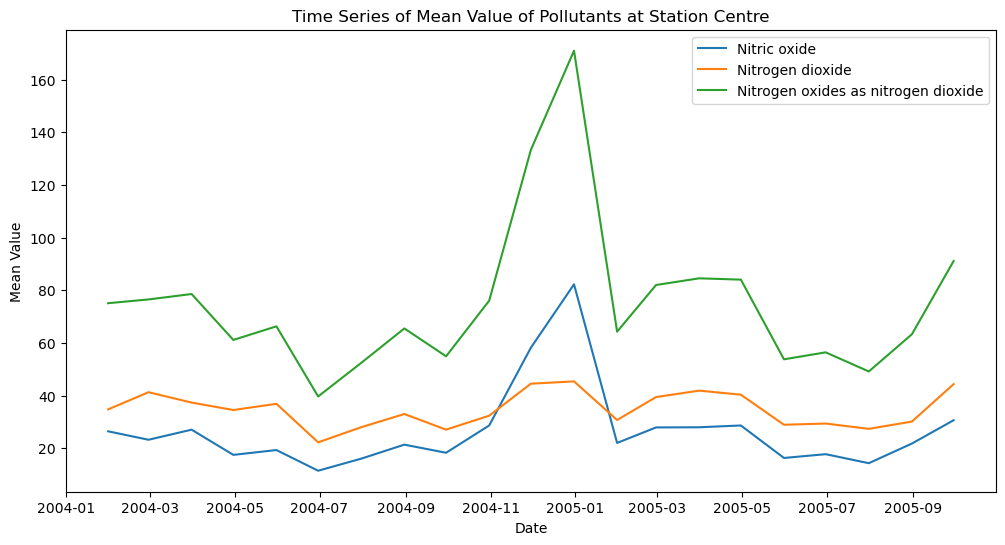

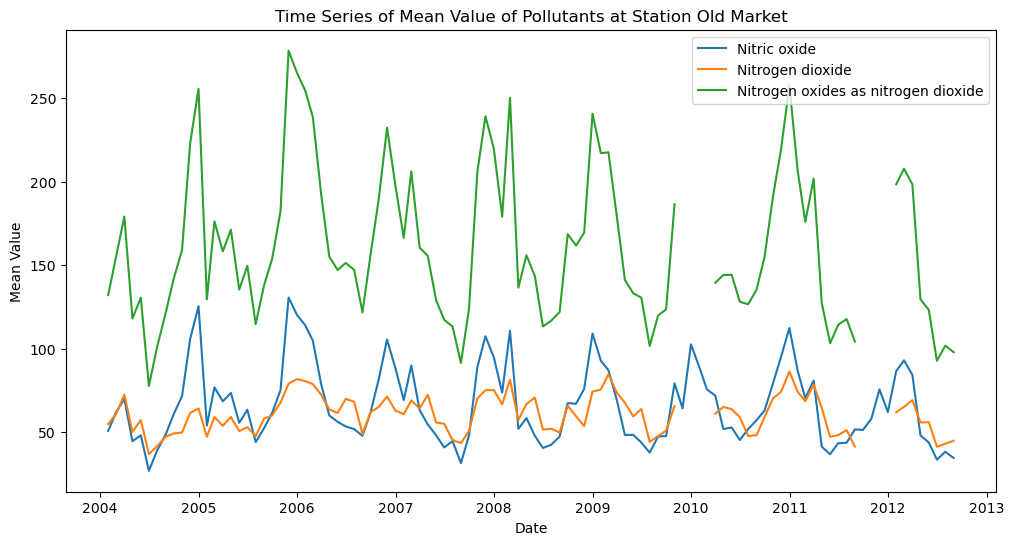

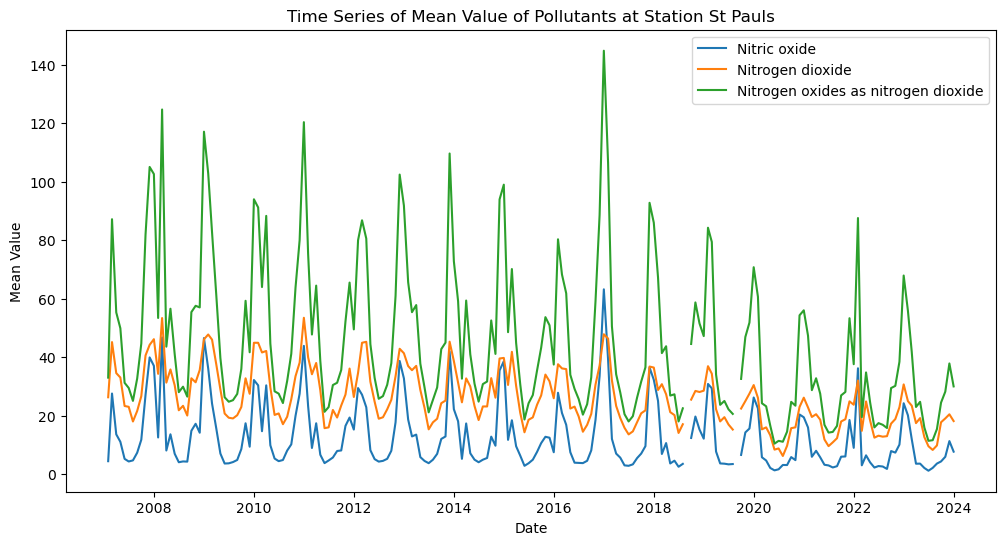

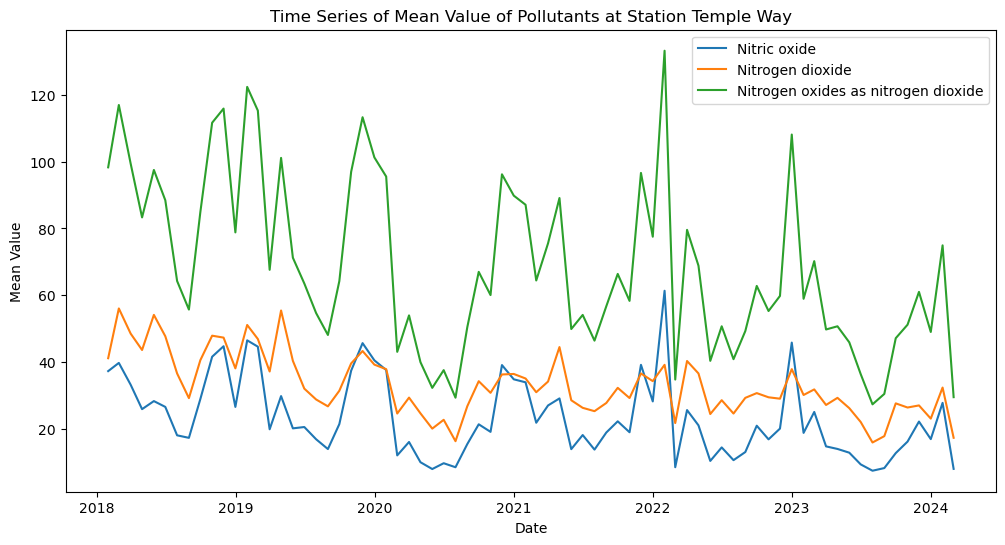

In [27]:
# Iterate over stations and create separate plots
for station in stations:
    plt.figure(figsize=(12, 6))
    for pollutant in Nitrogen_pollutants:
        # Filter data for the current station and pollutant
        station_data = monthly_air_pollution.loc[station]
        plt.plot(station_data.index.get_level_values('Date'), 
                 station_data[(pollutant, 'mean')], 
                 label=pollutant)
    
    plt.xlabel('Date')
    plt.ylabel('Mean Value')
    plt.title(f'Time Series of Mean Value of Pollutants at Station {station}')
    plt.legend()
    plt.show()